# LSTM Model Building and Training

## Import Libraries

In [1]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.optimizers import Adam
from keras.callbacks import CSVLogger

import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image
from IPython.core.display import HTML
Image(url= "Picture3.jpg", width=850, height=1500)

Using TensorFlow backend.


## Load MTD Transmission Data

In [2]:
train_1 = np.load('5_mtd_train_restruct.npz')['dat_tr']
train_2 = np.load('5_mtd_train_restruct.npz')['lbl_tr']
test_1= np.load('5_mtd_test_restruct.npz')['dat_ts']
test_2 = np.load('5_mtd_test_restruct.npz')['lbl_ts']

## LSTM Model Building

In [3]:
def build_regressor():
    
    regressor = Sequential()
    
    # Adding input LSTM layer and Dropout regularisation
    regressor.add(LSTM(units = 26, 
                       return_sequences = True, 
                       input_shape = (train_1.shape[1], 5)))
    regressor.add(Dropout(0.2))

    # Adding a second LSTM layer and Dropout regularisation
    regressor.add(LSTM(units = 15, 
                       return_sequences = True))
    regressor.add(Dropout(0.2))

    # Adding a thired LSTM layer and Dropout regularisation
    regressor.add(LSTM(units = 15))
    regressor.add(Dropout(0.2))

    # Adding the output layer
    regressor.add(Dense(units = 5))

    # Compiling the RNN
    regressor.compile(optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False),
                      loss = 'mean_squared_error',
                      metrics=['binary_accuracy'])

    return regressor

In [4]:
regressor = build_regressor()
regressor.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 12, 26)            3328      
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 26)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 12, 15)            2520      
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 15)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 15)                1860      
_________________________________________________________________
dropout_3 (Dropout)          (None, 15)                0         
_______________________________________

In [5]:
csv_logger = CSVLogger('logv1.csv', 
                       append=True, 
                       separator=',')

## LSTM Model Training

In [6]:
history1 = regressor.fit(train_1, 
                         train_2, 
                         batch_size = 128, 
                         validation_data=(test_1, test_2), 
                         epochs = 100, 
                         callbacks=[csv_logger])


Train on 9588 samples, validate on 2388 samples
Epoch 1/100
9588/9588 [==============================] - 2s 236us/step - loss: 0.2819 - binary_accuracy: 0.6019 - val_loss: 0.2340 - val_binary_accuracy: 0.6076
Epoch 2/100
9588/9588 [==============================] - 1s 129us/step - loss: 0.2441 - binary_accuracy: 0.6031 - val_loss: 0.2325 - val_binary_accuracy: 0.6081
Epoch 3/100
9588/9588 [==============================] - 1s 129us/step - loss: 0.2362 - binary_accuracy: 0.6158 - val_loss: 0.2179 - val_binary_accuracy: 0.6393
Epoch 4/100
9588/9588 [==============================] - 1s 132us/step - loss: 0.2217 - binary_accuracy: 0.6411 - val_loss: 0.2029 - val_binary_accuracy: 0.6678
Epoch 5/100
9588/9588 [==============================] - 1s 134us/step - loss: 0.2102 - binary_accuracy: 0.6621 - val_loss: 0.1955 - val_binary_accuracy: 0.6786
Epoch 6/100
9588/9588 [==============================] - 1s 131us/step - loss: 0.2038 - binary_accuracy: 0.6739 - val_loss: 0.1900 - val_binary_ac

## Visualizing the model training process

Following codes use to visualize the accuracy and loss variation of the very ﬁrst training process. According to [figure 3.6] Mean Squad Error (MSE), almost get converged after 80th epoch and mean squad error calculated based on training dataset is much lower than mean squad error calculated on testing dataset. Similarly, [figure 3.7] shows binary accuracy variation during the initial model training process and it is converged after the 80th epoch. 

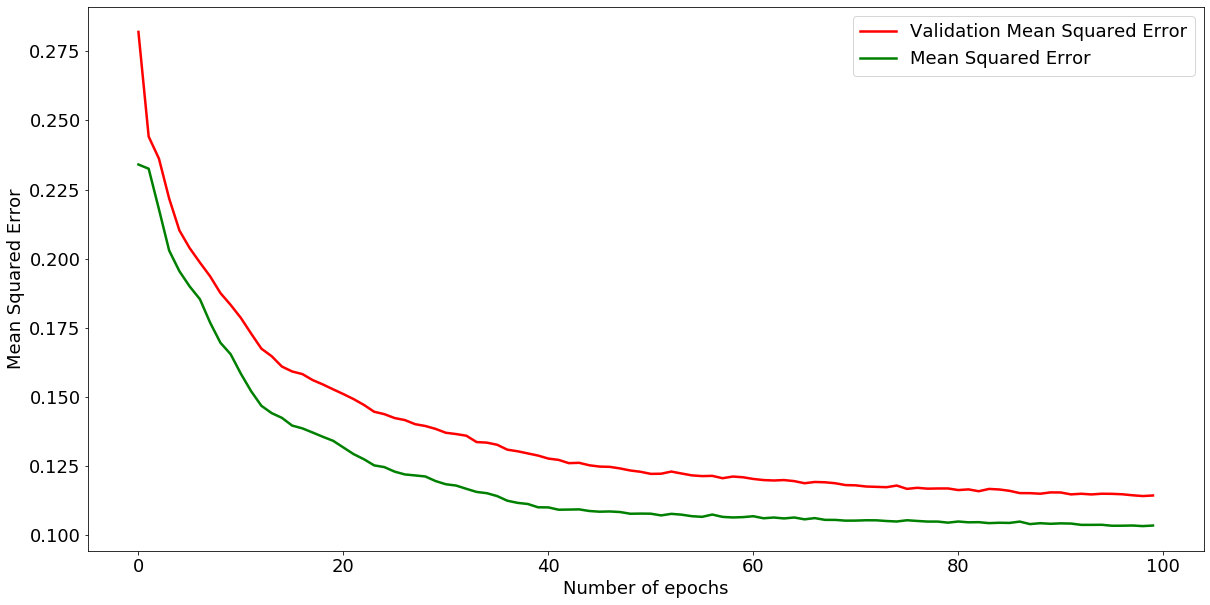

In [7]:
plt.rcParams['figure.figsize']=(20,10)
font ={'size':18}
plt.rc('font',**font)
plt.plot(history1.history['loss'],'r',linewidth=2.5)
plt.plot(history1.history['val_loss'],'g',linewidth=2.5)
plt.ylabel('Mean Squared Error')
plt.xlabel('Number of epochs')
plt.legend(['Validation Mean Squared Error','Mean Squared Error'], loc='upper right')
plt.show()

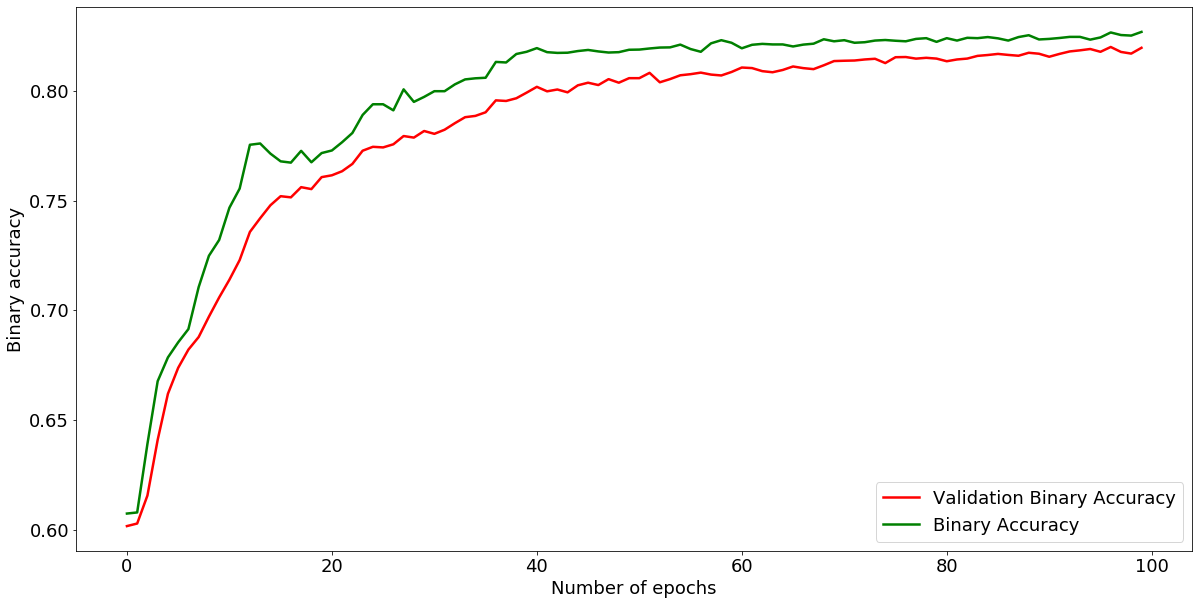

In [8]:
plt.rcParams['figure.figsize']=(20,10)
font ={'size':18}
plt.rc('font',**font)
plt.plot(history1.history['binary_accuracy'],'r',linewidth=2.5)
plt.plot(history1.history['val_binary_accuracy'],'g',linewidth=2.5)
plt.ylabel('Binary accuracy')
plt.xlabel('Number of epochs')
plt.legend(['Validation Binary Accuracy', 'Binary Accuracy'], loc='lower right')
plt.show()